In [2]:
!where python

C:\ProgramData\anaconda3\python.exe
C:\Users\91918\AppData\Local\Microsoft\WindowsApps\python.exe


In [3]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Step 1: Create an imbalanced binary classification dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=2, n_redundant=8, 
                           weights=[0.9, 0.1], flip_y=0, random_state=42)

np.unique(y, return_counts=True)

(array([0, 1]), array([900, 100]))

In [5]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [6]:
# Define the model hyperparameters
params = {
    "solver": "lbfgs",
    "max_iter": 1000,
    "multi_class": "auto",
    "random_state": 42,
}

# Train the model
lr = LogisticRegression(**params)
lr.fit(X_train, y_train)

# Predict on the test set
y_pred = lr.predict(X_test)

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       270
           1       0.62      0.50      0.56        30

    accuracy                           0.92       300
   macro avg       0.79      0.73      0.76       300
weighted avg       0.91      0.92      0.92       300



In [7]:
report_dict = classification_report(y_test, y_pred, output_dict=True)
report_dict

{'0': {'precision': 0.9456521739130435,
  'recall': 0.9666666666666667,
  'f1-score': 0.9560439560439561,
  'support': 270.0},
 '1': {'precision': 0.625,
  'recall': 0.5,
  'f1-score': 0.5555555555555556,
  'support': 30.0},
 'accuracy': 0.92,
 'macro avg': {'precision': 0.7853260869565217,
  'recall': 0.7333333333333334,
  'f1-score': 0.7557997557997558,
  'support': 300.0},
 'weighted avg': {'precision': 0.9135869565217392,
  'recall': 0.92,
  'f1-score': 0.9159951159951161,
  'support': 300.0}}

In [8]:
pip install mlflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [11]:
import mlflow

In [12]:
mlflow.set_experiment("1st Experiment")
mlflow.set_tracking_uri(uri="http://127.0.0.1:5000/")
#mlflow.set_tracking_uri("http://localhost:5000")

with mlflow.start_run():
    mlflow.log_params(params)
    mlflow.log_metrics({
        'accuracy': report_dict['accuracy'],
        'recall_class_0': report_dict['0']['recall'],
        'recall_class_1': report_dict['1']['recall'],
        'f1_score_macro': report_dict['macro avg']['f1-score']
    })
    mlflow.sklearn.log_model(lr, "Logistic Regression") 

2025/09/26 23:34:16 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/26 23:34:40 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run nebulous-skunk-591 at: http://127.0.0.1:5000/#/experiments/473060698087712002/runs/0a36c1ffcbb54bc38fd5db894b640f46
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/473060698087712002


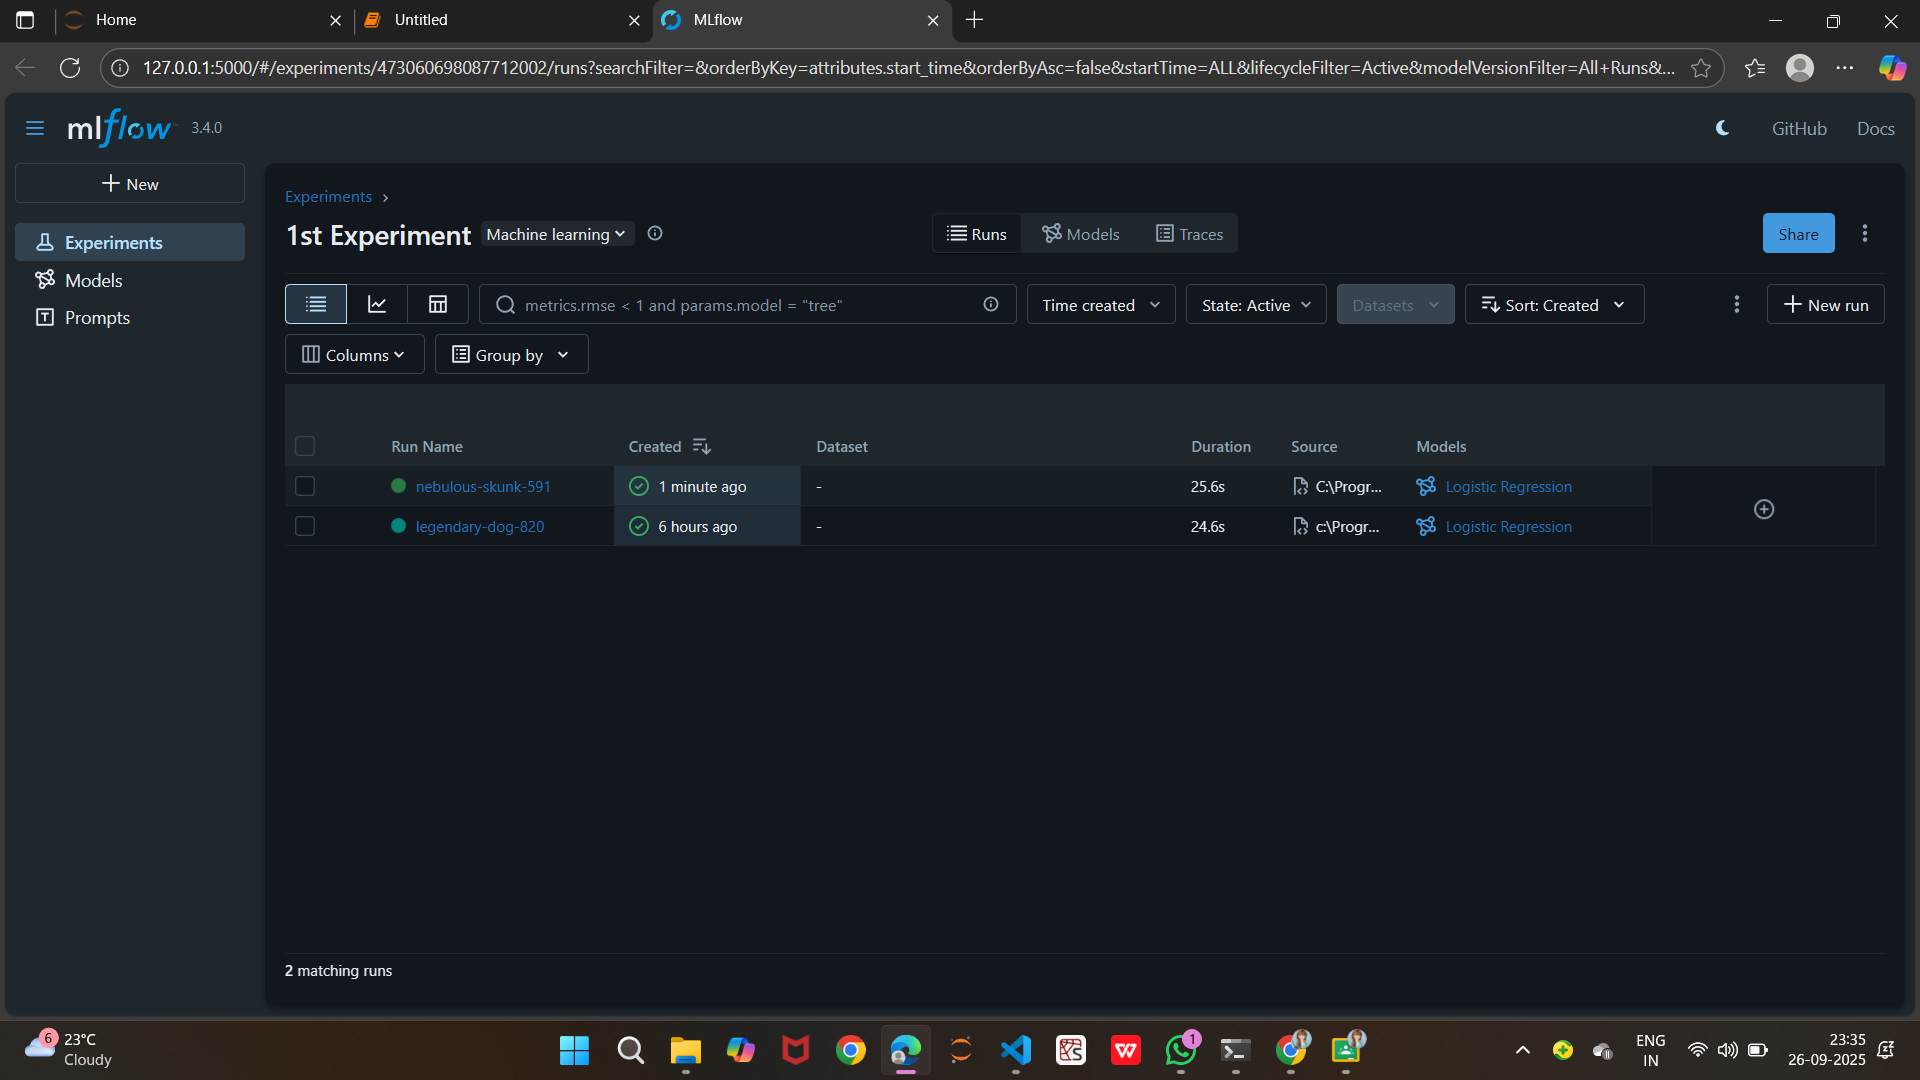